### Historical California Wildfire Data

The California Department of Forestry and Fire Protection (CAL FIRE) maintains historical data about wildfires in California. At present, this includes both detailed GIS (Geographic Information System) files describing the geography (perimeters) of individual fires, as well  historical statistical summaries listing many fires over many years. CAL FIRE previously hosted an Excel spreadsheet containing these summary statistics, which we will be working with. 

You can either access the spreadsheet by cloning
our github repository containing this notebook, or you can download it separately <a href="https://github.com/CornellCAC/python-data-science-notebooks/blob/main/data/wildfires/Fires_100.xlsx">from this link in our repository</a>.
There is also some work analyzing this same dataset by a USGS research scientist, hosted at that scientist's <a href="https://github.com/abarbour/FireHistory/tree/master/data">github site</a>. More recently, the CAL FIRE website was reorganized to present those data in a slightly different format; if you'd like to work with that more recent data instead, you will need to modify some of the code presented here to accomodate the slightly different data format, as described in Exercise #2 at the bottom of this notebook.

The spreadsheet contains information on California fires dating back to 1878, providing the following summary information for each identified fire (with some data fields missing for some fires):

* YEAR
* STATE
* AGENCY
* UNIT_ID
* FIRE_NAME
* INC_NUM (incident number)
* ALARM_DATE
* CONT_DATE (containment date)
* CAUSE
* COMMENTS
* REPORT_AC (reported number of acres burned)
* GIS_ACRES (number of acres burned as determined by analysis of GIS data)
* C_METHOD
* OBJECTIVE

In the following analyses, the data fields that will be of most interest to us are YEAR, AGENCY, ALARM_DATE, CONT_DATE, and GIS_ACRES.

### Dealing with data

While this dataset from CAL FIRE is extremely useful, it is sometimes the case the data you acquire will need to be cleaned up some in order for you to begin working with it.  Here you will learn some useful tools within pandas for cleaning up data of this sort.

First, let's import some modules that will be useful for analyzing and plotting data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Previously you used a pandas function to read tabular data from a csv file into a DataFrame.

You can use a similar function to read tabular data stored in an Excel spreadsheet.
- Tabular data in an Excel spreadsheet is of the same form, just in a different format.
- If a spreadsheet file contains more than one sheet, you usually will want to specify which sheet name to read.

In [2]:
df16 = pd.read_excel('../data/wildfires/Fires_100.xlsx', sheet_name='2016')
df16.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,59468.8800,<Null>,Suppression (Wildfire)
1,1895,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,628.1136,<Null>,Suppression (Wildfire)
2,1896,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,7531.7170,<Null>,Suppression (Wildfire)
3,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,1660.1030,<Null>,Suppression (Wildfire)
4,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,428.4387,<Null>,Suppression (Wildfire)


Let's have a look at the data. Each row specifies a particular fire.  Some of the more important columns are the YEAR, as well as
- ALARM_DATE (when fire was first identified),
- CONT_DATE (when the fire was considered contained),
- GIS_ACRES (number of acres burned, as determined through the use of GIS tools).

### What's in the DataFrame?

In [3]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        11789 non-null  object 
 1   STATE       11795 non-null  object 
 2   AGENCY      11795 non-null  object 
 3   UNIT_ID     11794 non-null  object 
 4   FIRE_NAME   11769 non-null  object 
 5   INC_NUM     11720 non-null  object 
 6   ALARM_DATE  11795 non-null  object 
 7   CONT_DATE   11795 non-null  object 
 8   CAUSE       11795 non-null  object 
 9   COMMENTS    1961 non-null   object 
 10  REPORT_AC   11795 non-null  object 
 11  GIS_ACRES   11795 non-null  float64
 12  C_METHOD    11795 non-null  object 
 13  OBJECTIVE   11795 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.3+ MB


### Oddities 

Something looks a little funny here.  Look at some of the entries near the top of the DataFrame, and compare that with the summary information provided by <code>info()</code>.

There is a disconnect &mdash; what is it?

One problem is that there are cell values which are supposed to be empty or missing (encoded as `<Null>`), but `info()` wants to count them as non-null.

Pandas can handle missing data, but it turns out that `<Null>` is a non-standard representation for missing data. So Pandas interprets it as the string "`<Null>`".

Fortunately, the <code>pd.read_excel()</code> function has an option for specifying additional missing values.

In [4]:
df16 = pd.read_excel('../data/wildfires/Fires_100.xlsx', sheet_name='2016', na_values=['<Null>'])
df16.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)


### Re-examining the DataFrame

In [5]:
df16.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)


In [6]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YEAR        11733 non-null  float64       
 1   STATE       11795 non-null  object        
 2   AGENCY      11795 non-null  object        
 3   UNIT_ID     11792 non-null  object        
 4   FIRE_NAME   11767 non-null  object        
 5   INC_NUM     11319 non-null  object        
 6   ALARM_DATE  7810 non-null   object        
 7   CONT_DATE   2974 non-null   datetime64[ns]
 8   CAUSE       11784 non-null  object        
 9   COMMENTS    1729 non-null   object        
 10  REPORT_AC   3506 non-null   float64       
 11  GIS_ACRES   11795 non-null  float64       
 12  C_METHOD    3352 non-null   object        
 13  OBJECTIVE   11739 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(10)
memory usage: 1.3+ MB


### Working with timestamps (datetime objects)

Curiously, the ALARM_DATE is interpreted as an "object" (read: string), and CONT_DATE is interpreted as a date (datetype64[ns]).  The reason for this discrepancy appears to be the fact that two of the ALARM_DATEs occurred before 1900, and pandas does not correctly interpret them as dates, leaving them as strings.  It would be good if they were both interpreted as dates so that we could operate on them as such.

If we revisit the documentation for <code>pd.excel</code>, we see that there is an option to specify what converter function to use for particular datatypes.  The pandas datetime converter <code>pd.to_datetime</code> is just what we want:

In [7]:
df16 = pd.read_excel('../data/wildfires/Fires_100.xlsx', sheet_name='2016', na_values=['<Null>'], 
                   converters= {'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})

In [8]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YEAR        11733 non-null  float64       
 1   STATE       11795 non-null  object        
 2   AGENCY      11795 non-null  object        
 3   UNIT_ID     11792 non-null  object        
 4   FIRE_NAME   11767 non-null  object        
 5   INC_NUM     11319 non-null  object        
 6   ALARM_DATE  7810 non-null   datetime64[ns]
 7   CONT_DATE   2974 non-null   datetime64[ns]
 8   CAUSE       11784 non-null  object        
 9   COMMENTS    1729 non-null   object        
 10  REPORT_AC   3506 non-null   float64       
 11  GIS_ACRES   11795 non-null  float64       
 12  C_METHOD    3352 non-null   object        
 13  OBJECTIVE   11739 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 1.3+ MB


### Concatenating datasets

As was mentioned previously, the CAL FIRE data contains multiple worksheets, including information about fires in 2017 that were not included in the aggregated historical data in the 2016 sheet.  We can read in that additional 2017 data and concatentate it with the 2016 data to build a complete dataset.  In doing so, however, we'll have to do a bit more data cleaning.

First, let's read in the 2017 sheet, and compare the column headings for the 2016 and 2017 dataframes.  We're assuming that the columns in each dataframe will be the same, so that we can concatenate along the row-wise dimension (axis=0).

In [9]:
df17 = pd.read_excel('../data/wildfires/Fires_100.xlsx', sheet_name='2017', na_values=['<Null>'], 
                   converters= {'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})
print(df17.columns)
print(df16.columns)

Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')
Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')


The column names look *almost* identical, but we can see that the first column in df17 is "YEAR_" and the first in 2016 is "YEAR".  In order to be able to concatenate these dataframes smoothly, we'll want to rename the column in df17, which we can do with the rename method on the dataframe.

In [10]:
df17.rename(columns={'YEAR_': 'YEAR'}, inplace=True)

In [11]:
df17.columns

Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')

In [12]:
dffires = pd.concat((df16, df17), axis=0)
dffires.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)


Now that the ALARM_DATE and CONT_DATE are both interpreted as datetime objects, we can use them to compute a new quantity not contained in the original dataset: fire duration, i.e., the time between when the fire was first identified and when it was contained.

Within Pandas, we can add a new column to the dataset: `df['DURATION']`

### Augmenting data: wildfire duration

Add a new column called DURATION which is the difference between the CONT_DATE and the ALARM_DATE.

Hint: Because CONT_DATE and ALARM_DATE are now both <code>datetime</code> objects, you can subtract one from the other.  The resulting object is of type <code>timedelta</code>.  Let's extract the number of days associated with that time difference: the attribute <code>dt.days</code> of a <code>timedelta</code> object provides that information.

In [13]:
dffires['DURATION'] = (dffires['CONT_DATE'] - dffires['ALARM_DATE']).dt.days

In [14]:
dffires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11977 entries, 0 to 181
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YEAR        11915 non-null  float64       
 1   STATE       11977 non-null  object        
 2   AGENCY      11977 non-null  object        
 3   UNIT_ID     11974 non-null  object        
 4   FIRE_NAME   11949 non-null  object        
 5   INC_NUM     11501 non-null  object        
 6   ALARM_DATE  7992 non-null   datetime64[ns]
 7   CONT_DATE   3156 non-null   datetime64[ns]
 8   CAUSE       11966 non-null  object        
 9   COMMENTS    1803 non-null   object        
 10  REPORT_AC   3650 non-null   float64       
 11  GIS_ACRES   11977 non-null  float64       
 12  C_METHOD    3534 non-null   object        
 13  OBJECTIVE   11921 non-null  object        
 14  DURATION    3150 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 1.5+ MB


In [15]:
print(dffires['DURATION'].min(), dffires['DURATION'].max())

-32862.0 3319.0


That's weird.  Even though the CONT_DATE presumably should occur <i>after</i> the ALARM_DATE, some of the fire durations are negative.  We can examine them by filtering the dataframe:

In [16]:
dffires[dffires.DURATION<0]

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
6728,1978.0,California,USDA Forest Service,Stanislaus National Forest,KIBBIE,NaN,1979-08-08,1978-11-10,1 - Lightning,20090305,192.000000,227.8784,6 - Hand Drawn,Suppression (Wildfire),-271.0
8159,1987.0,California,National Park Service,Sequoia - Kings Canyon NP,COFFEE,0,1987-09-29,1987-09-10,1 - Lightning,NaN,240.000000,196.1928,8 - Unknown,Suppression (Wildfire),-19.0
9138,1996.0,California,California Department of Forestry and Fire Pro...,Nevada - Yuba - Placer CAL FIRE,COLUMBIA HILL,0,1996-10-21,1996-10-20,5 - Debris,NaN,NaN,1517.4430,NaN,Suppression (Wildfire),-1.0
10375,2005.0,California,Contract County,Los Angeles County,SIERRA,149034,2005-07-13,2005-04-14,8 - Playing with fire,NaN,364.000000,364.3786,8 - Unknown,Suppression (Wildfire),-90.0
10618,2007.0,California,Bureau of Land Management,Bakersfield District - BLM (old),BROWN,1504,2007-07-20,2007-06-23,9 - Miscellaneous,,84.700000,1430.3170,1 - GPS Ground,Suppression (Wildfire),-27.0
11511,2014.0,California,National Park Service,Yosemite National Park,DARK HOLE,57,2015-07-16,2014-09-27,1 - Lightning,Managed Lightning Ignited,1076.479248,1076.4790,1 - GPS Ground,NaN,-292.0
11559,2015.0,California,USDA Forest Service,Humbolt-Toiyabe National Forest,WASHINGTON,30251,2015-07-19,2015-01-01,1 - Lightning,,NaN,17779.5400,3 - Infrared,Suppression (Wildfire),-199.0
11639,2016.0,California,California Department of Forestry and Fire Pro...,Tuolumne - Calaveras CAL FIRE,MARSHES,10403,2106-09-26,2016-10-05,10 - Vehicle,NaN,1080.000000,930.5065,3 - Infrared,Suppression (Wildfire),-32862.0
126,2017.0,California,USDA Forest Service,Plumas National Forest,SQUIRREL,1273,2017-09-27,2017-08-29,7 - Arson,NaN,350.000000,113.0544,6 - Hand Drawn,Suppression (Wildfire),-29.0


In addition to the fires with negative duration, there is also a weird fire lasting more than 3000 days.  Let's assume that both of these situations are arising from data errors, and just remove them from the dataset.

In [17]:
dffires = dffires[(dffires.DURATION >= 0) & (dffires.DURATION < 3000)]

## Plotting wildfire size and duration distributions

Histograms are a useful way of summarizing distributions, and <code>plt.hist</code> is a convenient function for plotting them.  Wildfire sizes and durations both extend over broad ranges, so it is useful to make these plots on a log-log axis, using the <code>plt.loglog</code> function.  The distributions are roughly linear on these log-log plots, suggesting a power-law distribution in each case.

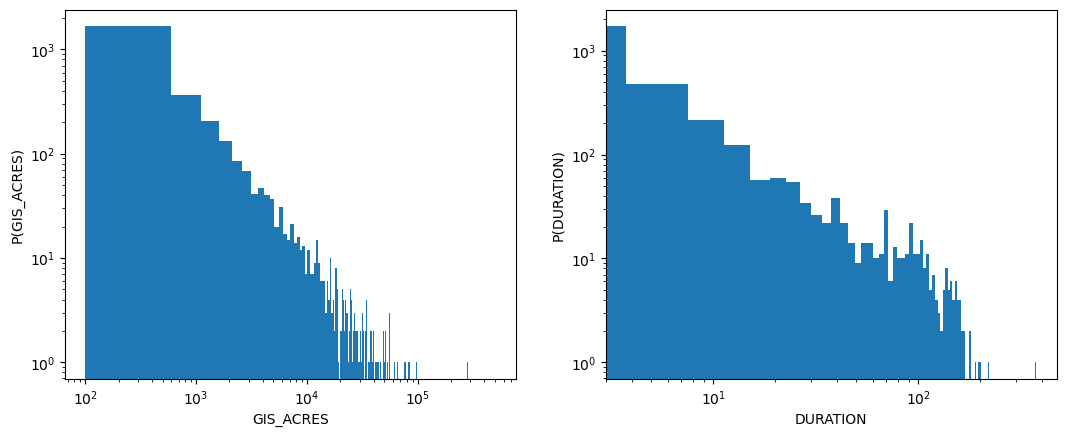

In [18]:
plt.figure(figsize=[12.8,4.8])
plt.subplot(1,2,1)
plt.hist(dffires.GIS_ACRES, bins=1000)
plt.loglog()
plt.xlabel('GIS_ACRES'); plt.ylabel('P(GIS_ACRES)')
plt.subplot(1,2,2)
plt.hist(dffires.DURATION, bins=100)
plt.loglog()
plt.xlabel('DURATION'); plt.ylabel('P(DURATION)');
#plt.savefig('wildfire_distributions.png')

### Relationship between fire size and duration

Now that we have computed the time duration for 2968 wildfires, let's see how those durations are related to the sizes (GIS_ACRES). 

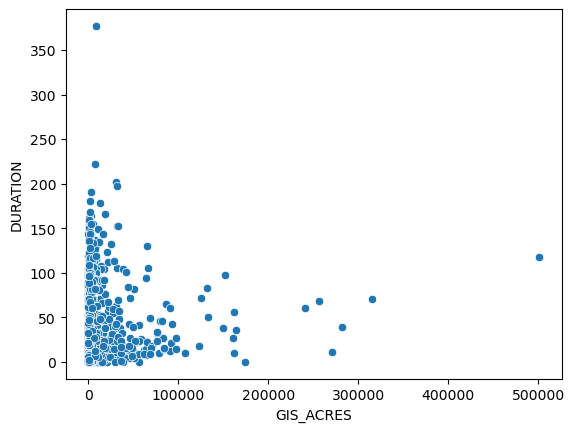

In [19]:
sns.scatterplot(data = dffires, x='GIS_ACRES', y='DURATION');

### Not much correlation between duration and size

We might expect some sort of correlation between duration and size, i.e., that bigger fires should probably tend to last longer.  There does not appear to be much correlation in this historical data, however.  Replotting the data, but coloring by which AGENCY is responsible for dealing with the fire, does suggest that some of this lack of correlation may be due to different management practices or suppression policies used by different agencies.

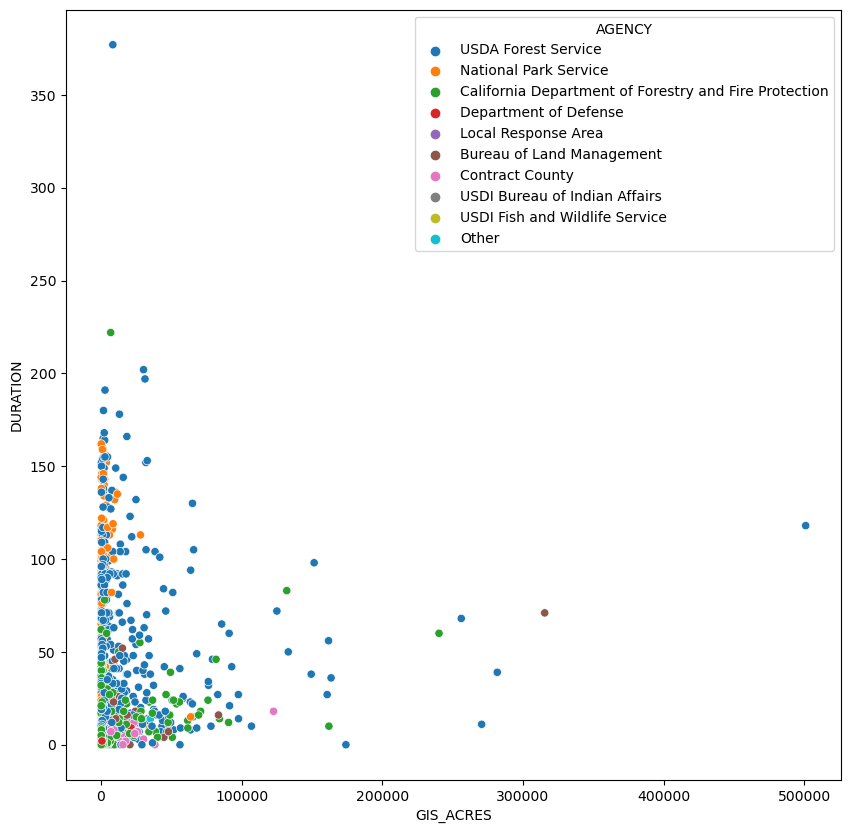

In [20]:
plt.figure(figsize=(10,10))
# make a scatterplot of DURATION vs GIS_ACRES, and color each point by AGENCY
sns.scatterplot(data=dffires, x='GIS_ACRES', y='DURATION', hue='AGENCY');
#plt.savefig('duration_vs_size_colored.png')

### Exercise #1: Are California wildfires getting worse over time?

Your objective to is make a plot of the total number of GIS_ACRES burned per year over the entire dataset.  

Hint: use the pandas groupby functionality discussed __[here](https://cvw.cac.cornell.edu/PyDataSci1/groupby)__.

In [21]:
# FILL IN THE SOLUTION TO THE EXERCISE HERE

The total number of acres is increasing over time, although one must also be sure that other potential confounding effects are accounted for (e.g., changes in reporting processes over time).

### Exercise #2: Reworking the code to accommodate newer data dumps

The excel file you have been working with in this notebook represents an older historical compilation of California wildfires through 2017, which was previously available on the CalFIRE website.  That website has been reconfigured, as has been the data delivery process.  Similar data is now available in a csv file that can be downloaded as such:

* Navigate to: https://gis.data.ca.gov/datasets/CALFIRE-Forestry::fire-perimeters/explore?showTable=true
* In the sidebar on the left, click "Download"
* In the box labeled "CSV", click "Download Options"
* Select one of the available download options &mdash; if there is an option to download a previously generated file, that will probably be quicker.

The newer repository now contains more recent fires, and appears to list many more fires than were part of the earlier excel compilation.  If you're interested in exploring those data further, you will need to modify the relevant aspects of the code in this notebook to deal with the fact that some of the column headers have been changed.  (You might want to make a separate copy of this notebook in order to make modifications without breaking the existing code.) The core information that we have used here -- such as the ALARM_DATE, CONT_DATE, and GIS_ACRES fields -- continue to be included in that dataset.

Go ahead and investigate the new dataset.  Are the conclusions of Exericse #1 borne out with the more recent data?  Can you glean any insights into why the newer dataset contains substantially more fires than the previous one?